### Importing dataset

In [1]:
import numpy as np
import pandas as pd

In [3]:
dataset = pd.read_csv('a1_RestaurantReviews_HistoricDump.tsv', delimiter = '\t', quoting = 3)
dataset.head()

,Review,Liked
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1


### Data cleaning

In [4]:
dataset.shape

(900, 2)

In [5]:
dataset.head()

,Review,Liked
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1


### Data Preprocessing

In [7]:
import re
import nltk

#nltk.download('stopwords')

from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()

all_stopwords = stopwords.words('english')
all_stopwords.remove('not')

In [8]:
corpus=[]
for i in range(0, 900):
    review = re.sub('[^a-zA-Z]', ' ', dataset['Review'][i])
    review = review.lower()
    review = review.split()
    review = [ps.stem(word) for word in review if not word in set(all_stopwords)]
    review = ' '.join(review)
    corpus.append(review)

In [9]:
corpus

['wow love place',
 'crust not good',
 'not tasti textur nasti',
 'stop late may bank holiday rick steve recommend love',
 'select menu great price',
 'get angri want damn pho',
 'honeslti tast fresh',
 'potato like rubber could tell made ahead time kept warmer',
 'fri great',
 'great touch',
 'servic prompt',
 'would not go back',
 'cashier care ever say still end wayyy overpr',
 'tri cape cod ravoli chicken cranberri mmmm',
 'disgust pretti sure human hair',
 'shock sign indic cash',
 'highli recommend',
 'waitress littl slow servic',
 'place not worth time let alon vega',
 'not like',
 'burritto blah',
 'food amaz',
 'servic also cute',
 'could care less interior beauti',
 'perform',
 'right red velvet cake ohhh stuff good',
 'never brought salad ask',
 'hole wall great mexican street taco friendli staff',
 'took hour get food tabl restaur food luke warm sever run around like total overwhelm',
 'worst salmon sashimi',
 'also combo like burger fri beer decent deal',
 'like final blow

In [12]:
from textblob import TextBlob
def polarity(text):
    return TextBlob(text).sentiment.polarity

In [13]:
dataset['polarity'] = dataset['Review'].apply(polarity)

In [14]:
dataset.head()

,Review,Liked,polarity
0,Wow... Loved this place.,1,0.40
1,Crust is not good.,0,-0.35
2,Not tasty and the texture was just nasty.,0,-1.00
3,Stopped by during the late May bank holiday of...,1,0.20
4,The selection on the menu was great and so wer...,1,0.80


In [22]:
def sentiment(label):
    if label <0:
        return "Negative"
    elif label ==0:
        return "Neutral"
    elif label>0:
        return "Positive"

In [24]:
dataset['sentiment'] = dataset['polarity'].apply(sentiment)

<AxesSubplot:xlabel='sentiment', ylabel='count'>

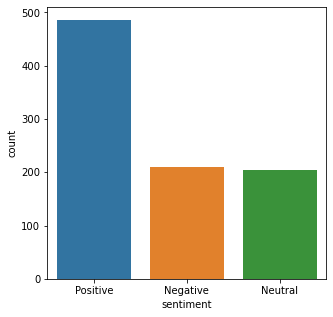

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns
fig = plt.figure(figsize=(5,5))
sns.countplot(x='sentiment', data = dataset)

Text(0.5, 1.0, 'Distribution of sentiments')

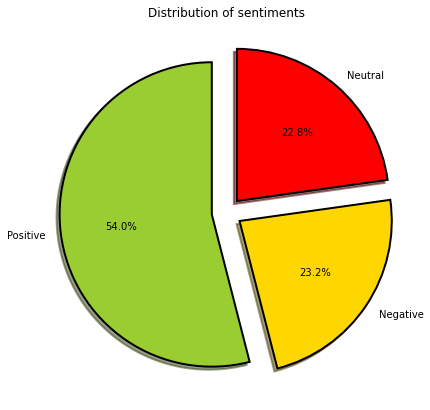

In [26]:
fig = plt.figure(figsize=(7,7))
colors = ("yellowgreen", "gold", "red")
wp = {'linewidth':2, 'edgecolor':"black"}
tags = dataset['sentiment'].value_counts()
explode = (0.1,0.1,0.1)
tags.plot(kind='pie', autopct='%1.1f%%', shadow=True, colors = colors,
         startangle=90, wedgeprops = wp, explode = explode, label='')
plt.title('Distribution of sentiments')

In [34]:
pos_tweets = dataset[dataset.sentiment == 'Positive']
pos_tweets = pos_tweets.sort_values(['polarity'], ascending= False)
pos_tweets.head()

,Review,Liked,polarity,sentiment
797,This place is great!!!!!!!!!!!!!!,1,1.0,Positive
757,This is a GREAT place to eat!,1,1.0,Positive
357,As always the evening was wonderful and the fo...,1,1.0,Positive
354,It was delicious!!!,1,1.0,Positive
190,you can watch them preparing the delicious food!),1,1.0,Positive


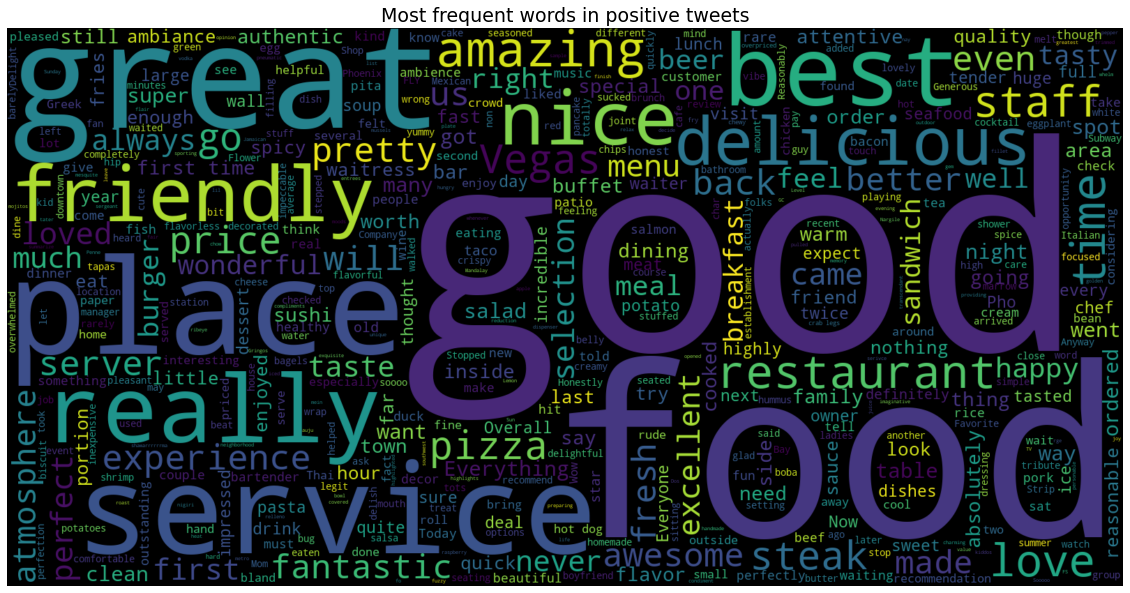

In [37]:
from wordcloud import WordCloud
text = ' '.join([word for word in pos_tweets['Review']])
plt.figure(figsize=(20,15), facecolor='None')
wordcloud = WordCloud(max_words=500, width=1600, height=800).generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title('Most frequent words in positive tweets', fontsize=19)
plt.show()

In [39]:
neg_tweets = dataset[dataset.sentiment == 'Negative']
neg_tweets = neg_tweets.sort_values(['polarity'], ascending= False)
neg_tweets.head()

,Review,Liked,polarity,sentiment
696,We had so much to say about the place before w...,0,-0.012500,Negative
849,"Bad day or not, I have a very low tolerance fo...",0,-0.015625,Negative
487,I dont think I will be back for a very long time.,0,-0.032500,Negative
242,By this time our side of the restaurant was al...,0,-0.037500,Negative
888,Seriously killer hot chai latte.,1,-0.041667,Negative


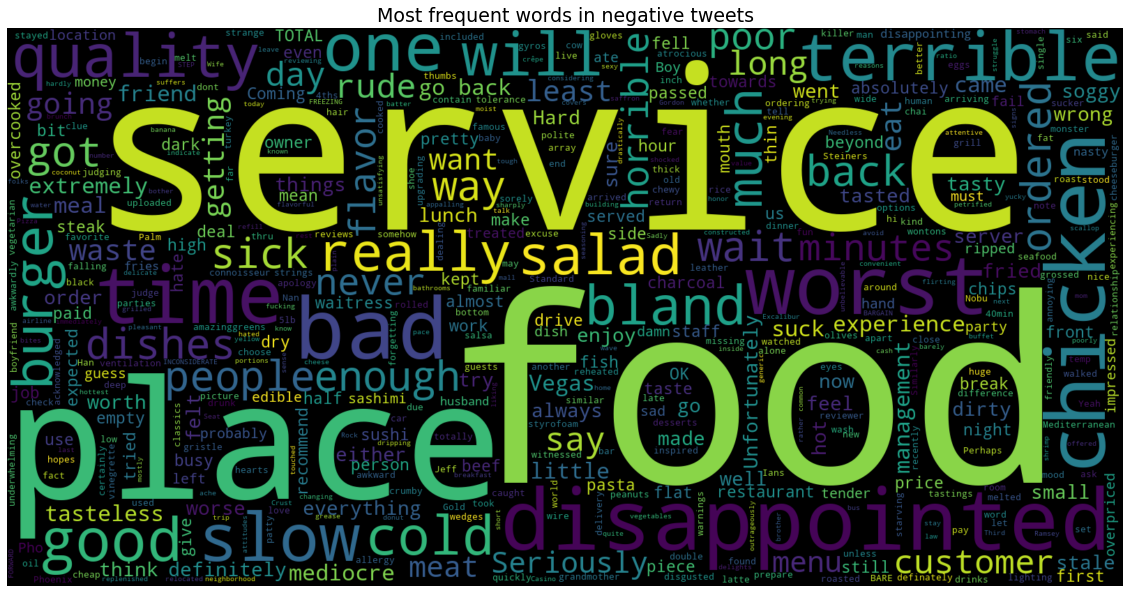

In [40]:
text = ' '.join([word for word in neg_tweets['Review']])
plt.figure(figsize=(20,15), facecolor='None')
wordcloud = WordCloud(max_words=500, width=1600, height=800).generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title('Most frequent words in negative tweets', fontsize=19)
plt.show()

In [41]:
neutral_tweets = dataset[dataset.sentiment == 'Neutral']
neutral_tweets = neutral_tweets.sort_values(['polarity'], ascending= False)
neutral_tweets.head()

,Review,Liked,polarity,sentiment
7,The potatoes were like rubber and you could te...,0,0.0,Neutral
628,I asked multiple times for the wine list and a...,0,0.0,Neutral
584,After I pulled up my car I waited for another ...,0,0.0,Neutral
586,"All in all, I can assure you I'll be back.",1,0.0,Neutral
592,OMG I felt like I had never eaten Thai food un...,1,0.0,Neutral


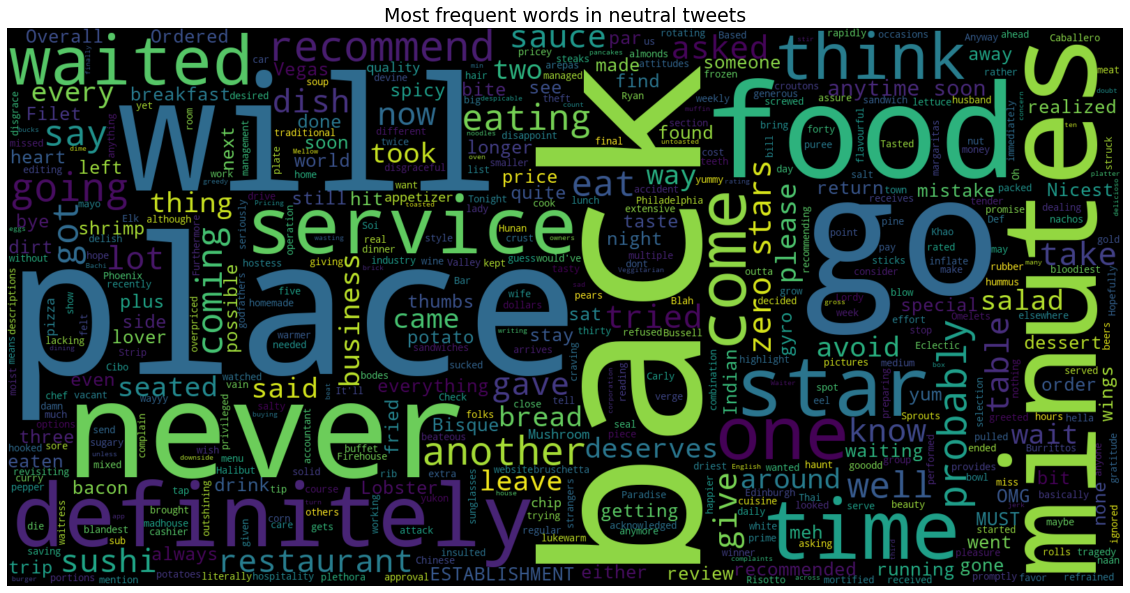

In [42]:
text = ' '.join([word for word in neutral_tweets['Review']])
plt.figure(figsize=(20,15), facecolor='None')
wordcloud = WordCloud(max_words=500, width=1600, height=800).generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title('Most frequent words in neutral tweets', fontsize=19)
plt.show()

In [ ]:
dataset

### Data Extraction

In [27]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features = 1420)

In [28]:
X = cv.fit_transform(corpus).toarray()
y = dataset['Liked']

In [29]:
X

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [30]:
y

0      1
1      0
2      0
3      1
4      1
      ..
895    1
896    1
897    1
898    0
899    1
Name: Liked, Length: 900, dtype: int64

### Dividing dataset into training and test set

In [31]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)

### Model fitting (Naive Bayes)

In [32]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, y_train)

GaussianNB()

In [33]:
y_pred = classifier.predict(X_test)

from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)

accuracy_score(y_test, y_pred)

[[67 11]
 [38 64]]


0.7277777777777777